In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.style.use('ggplot')

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

dims = X.shape, y.shape
print(f'Dimensions of X and y: {dims}')

Dimensions of X and y: ((100, 2), (100, 1))


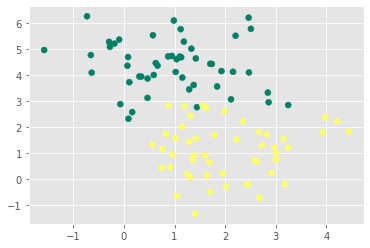

In [3]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap='summer',
)

In [4]:
# inistialization of Weights and bias
def initialize(x):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)

  return W, b

In [5]:
W, b = initialize(X)
W.shape, b.shape

((2, 1), (1,))

In [6]:
# model
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))

  return A


In [7]:
A = model(X,W,b)
A

array([[9.87123340e-02],
       [4.27025001e-01],
       [2.00870297e-03],
       [6.23619334e-02],
       [2.64490837e-01],
       [4.14187047e-02],
       [7.57626032e-03],
       [8.20394569e-02],
       [8.39918289e-03],
       [5.13587817e-01],
       [4.75673690e-03],
       [3.84568574e-01],
       [1.79434591e-03],
       [5.14393288e-03],
       [1.45671649e-01],
       [1.54636132e-01],
       [6.73830223e-01],
       [8.78370756e-03],
       [4.30465250e-01],
       [1.84596011e-01],
       [3.77789049e-03],
       [5.40928833e-03],
       [6.04769867e-02],
       [1.73517329e-03],
       [3.84216151e-01],
       [3.54119340e-03],
       [5.57681552e-01],
       [6.38322910e-04],
       [4.10331937e-03],
       [8.51950789e-02],
       [6.63662327e-01],
       [4.11886133e-03],
       [2.87974831e-01],
       [6.62293967e-01],
       [4.31433658e-02],
       [8.34264024e-03],
       [3.01665734e-01],
       [5.24489593e-02],
       [3.05596862e-02],
       [1.93447228e-01],


In [8]:
A.shape

(100, 1)

In [9]:
#  cost function
def log_loss(A, y):
  return -1 * 1/len(y) * np.sum(y * np.log(A) - (1-y) * np.log(1-A))

In [10]:
log_loss(A,y)

0.7229113025880719

In [11]:
# gradient descent
def gradients(A, X, y):
  dw = 1/len(y) * np.dot(X.T, A-y)
  db = 1/len(y) * np.sum(A-y)
  return dw, db

In [12]:
dw, db = gradients(A, X, y)

dw.shape, db.shape

((2, 1), ())

In [13]:
# update of errors minimization
def update(dw, db, w, b, lr):
  w = w - lr * dw
  b = b - lr * db
  return w, b

In [14]:
# prediction
def predict(x, w, b):
  A = model(x, w, b)
  return A >= .5

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# Preceptron
def artificial_nn(X, y, lr=1.e-4, n_iter=300):
  loss = []
  # initialize W, b
  W, b = initialize(X)

  for i in range(n_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, lr)
  
  y_pred = predict(X, W, b)
  print(f'Acuuracy: {accuracy_score(y, y_pred)}')

  plt.plot(loss)
  plt.show()

  return W, b

Acuuracy: 0.51


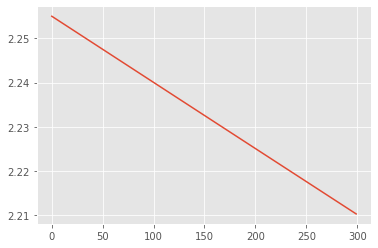

(array([[-0.74665029],
        [-1.72474551]]), array([-0.94874426]))

In [17]:
artificial_nn(X, y)

Acuuracy: 0.52


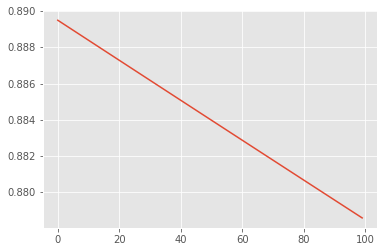

(array([[-0.68509188],
        [-0.5717522 ]]), array([0.420735]))

In [18]:
artificial_nn(X, y, n_iter=100)

Acuuracy: 0.89


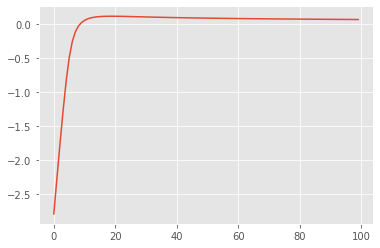

(array([[ 1.15338847],
        [-1.02035   ]]), array([0.57657445]))

In [19]:
artificial_nn(X, y, lr=0.1, n_iter=100)

Acuuracy: 0.86


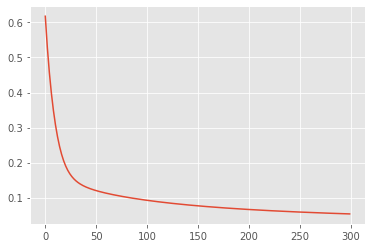

(array([[ 2.02568073],
        [-1.26599988]]), array([-0.1831263]))

In [20]:
artificial_nn(X, y, lr=0.1, n_iter=300)

Acuuracy: 0.94


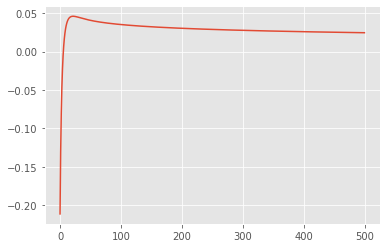

(array([[ 1.00864797],
        [-1.8481307 ]]), array([3.1874182]))

In [21]:
artificial_nn(X, y, lr=0.1, n_iter=500)

Acuuracy: 0.92


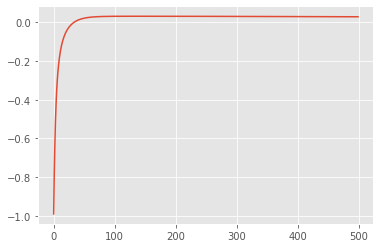

[[ 1.32520709]
 [-1.74344096]]
[2.35269827]


In [22]:
W, b = artificial_nn(X, y, lr=0.1, n_iter=500)
print(W)
print(b)